In [1]:
import numpy as np
from pylab import imshow, show
from timeit import default_timer as timer

In [2]:
def mandel(x, y, max_iters):
    c = complex(x, y)
    z = 0.0j
    
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i
        
    return max_iters

In [3]:
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]
    
    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

Mandelbrot created in 5.305423319824877


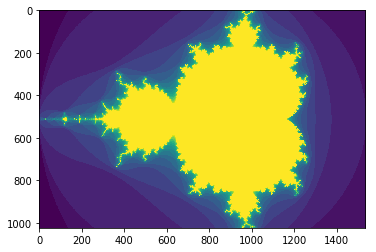

In [4]:
image = np.zeros((1024, 1536), dtype = np.uint8)
start = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20) 
dt = timer() - start

print("Mandelbrot created in", dt)
imshow(image)
show()

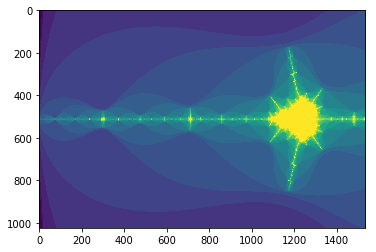

In [5]:
create_fractal(-2.0, -1.7, -0.1, 0.1, image, 20) 
imshow(image)
show()

In [6]:
from numba import autojit

@autojit
def mandel(x, y, max_iters):
    c = complex(x, y)
    z = 0.0j
    
    for i in range(max_iters):
        z = z*z + c
    if (z.real*z.real + z.imag*z.imag) >= 4:
        return i
    
    return max_iters

@autojit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    
    height = image.shape[0]
    width = image.shape[1]
    
    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

Mandelbrot created in 0.6428213051712675


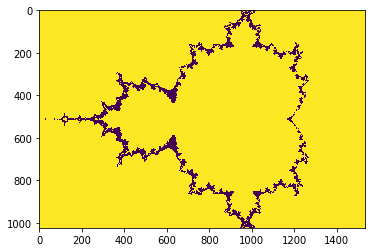

In [7]:
image = np.zeros((1024, 1536), dtype = np.uint8)
start = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20) 
dt = timer() - start

print("Mandelbrot created in", dt)
imshow(image)
show()

In [12]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5556215410417191436
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1459512934
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3276791589058730214
physical_device_desc: "device: 0, name: GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [9]:
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time
%matplotlib inline

def get_times(maximum_time):

    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    
    matrix_sizes = range(1,50000, 500)

    for size in matrix_sizes:
        
        print('size: ', size)
        
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.add(r2, r1)

            with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    print(result)
                    device_times[device_name].append(time_taken)

            print(device_times)

            if time_taken > maximum_time:
                return device_times, matrix_sizes


device_times, matrix_sizes = get_times(1.5)
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]

size:  1
####### Calculating on the /gpu:0 #######
[[1.319]]
{'/gpu:0': [0.04461550712585449], '/cpu:0': []}
####### Calculating on the /cpu:0 #######
[[1.329]]
{'/gpu:0': [0.04461550712585449], '/cpu:0': [0.011139392852783203]}
size:  501
####### Calculating on the /gpu:0 #######
[[0.7656 1.079  0.3477 ... 1.505  1.329  0.5273]
 [1.462  1.596  1.558  ... 0.925  0.741  1.068 ]
 [1.319  1.289  0.6494 ... 0.4502 0.4912 1.224 ]
 ...
 [1.203  0.3975 0.5215 ... 0.535  0.3838 1.412 ]
 [1.063  0.792  1.555  ... 0.542  0.3125 0.4102]
 [0.287  1.509  1.26   ... 0.915  1.721  1.326 ]]
{'/gpu:0': [0.04461550712585449, 0.009529352188110352], '/cpu:0': [0.011139392852783203]}
####### Calculating on the /cpu:0 #######
[[1.878   0.9756  1.522   ... 0.826   0.2842  0.4492 ]
 [0.10547 0.7266  0.6777  ... 0.3643  0.3096  1.096  ]
 [0.8086  0.713   0.7607  ... 1.402   1.373   1.199  ]
 ...
 [0.463   1.095   1.01    ... 1.3955  0.545   1.288  ]
 [1.272   0.5107  1.273   ... 0.832   1.292   0.9746 ]
 [1.15

[[0.5938 1.571  0.9688 ... 0.9307 0.573  1.071 ]
 [1.45   1.434  1.727  ... 0.797  1.     1.384 ]
 [1.071  1.164  1.097  ... 1.65   1.2705 1.007 ]
 ...
 [0.371  1.254  0.8223 ... 1.231  1.339  1.186 ]
 [0.7285 1.436  1.01   ... 1.142  1.67   0.457 ]
 [1.507  0.4229 0.8936 ... 1.082  1.6    0.747 ]]
{'/gpu:0': [0.04461550712585449, 0.009529352188110352, 0.009013652801513672, 0.012613773345947266, 0.016053199768066406, 0.018606185913085938, 0.02305889129638672, 0.018307924270629883, 0.031446218490600586], '/cpu:0': [0.011139392852783203, 0.021017789840698242, 0.022057294845581055, 0.04712224006652832, 0.06815910339355469, 0.10327577590942383, 0.15143322944641113, 0.1945650577545166, 0.25420165061950684]}
size:  4501
####### Calculating on the /gpu:0 #######
[[0.7715 0.6367 1.332  ... 0.957  0.574  0.4365]
 [1.508  1.243  1.126  ... 0.1602 0.1924 0.704 ]
 [0.9053 0.6895 0.916  ... 0.5957 0.6035 0.6797]
 ...
 [1.562  1.692  1.044  ... 0.2842 0.2051 0.5615]
 [1.168  1.032  1.071  ... 1.859 

[[0.5938 0.3643 1.343  ... 0.702  0.962  0.743 ]
 [0.801  1.689  1.002  ... 1.1045 1.33   1.099 ]
 [0.9316 1.265  1.086  ... 1.639  0.4922 0.667 ]
 ...
 [1.207  1.515  0.8496 ... 0.7686 0.2236 1.003 ]
 [1.001  0.954  0.3613 ... 0.2861 0.8604 0.8926]
 [1.711  1.14   0.994  ... 0.74   0.963  0.838 ]]
{'/gpu:0': [0.04461550712585449, 0.009529352188110352, 0.009013652801513672, 0.012613773345947266, 0.016053199768066406, 0.018606185913085938, 0.02305889129638672, 0.018307924270629883, 0.031446218490600586, 0.04010629653930664, 0.028576135635375977, 0.034090518951416016, 0.07219147682189941, 0.04612302780151367], '/cpu:0': [0.011139392852783203, 0.021017789840698242, 0.022057294845581055, 0.04712224006652832, 0.06815910339355469, 0.10327577590942383, 0.15143322944641113, 0.1945650577545166, 0.25420165061950684, 0.304811954498291, 0.40209031105041504, 0.46975278854370117, 0.5456631183624268, 0.649165153503418]}
size:  7001
####### Calculating on the /gpu:0 #######
[[0.2656 0.662  0.913  ... 

[[1.29   1.756  1.208  ... 0.756  0.88   1.556 ]
 [1.081  1.667  0.4785 ... 0.3535 1.782  1.62  ]
 [1.192  0.4043 1.451  ... 0.5703 1.199  0.3408]
 ...
 [1.118  1.2    1.197  ... 0.2031 0.7    1.004 ]
 [1.177  0.538  0.55   ... 0.9736 1.002  1.225 ]
 [0.6387 1.145  0.9277 ... 1.692  1.307  0.628 ]]
{'/gpu:0': [0.04461550712585449, 0.009529352188110352, 0.009013652801513672, 0.012613773345947266, 0.016053199768066406, 0.018606185913085938, 0.02305889129638672, 0.018307924270629883, 0.031446218490600586, 0.04010629653930664, 0.028576135635375977, 0.034090518951416016, 0.07219147682189941, 0.04612302780151367, 0.05112600326538086, 0.05815434455871582, 0.06316828727722168, 0.13085007667541504], '/cpu:0': [0.011139392852783203, 0.021017789840698242, 0.022057294845581055, 0.04712224006652832, 0.06815910339355469, 0.10327577590942383, 0.15143322944641113, 0.1945650577545166, 0.25420165061950684, 0.304811954498291, 0.40209031105041504, 0.46975278854370117, 0.5456631183624268, 0.649165153503418

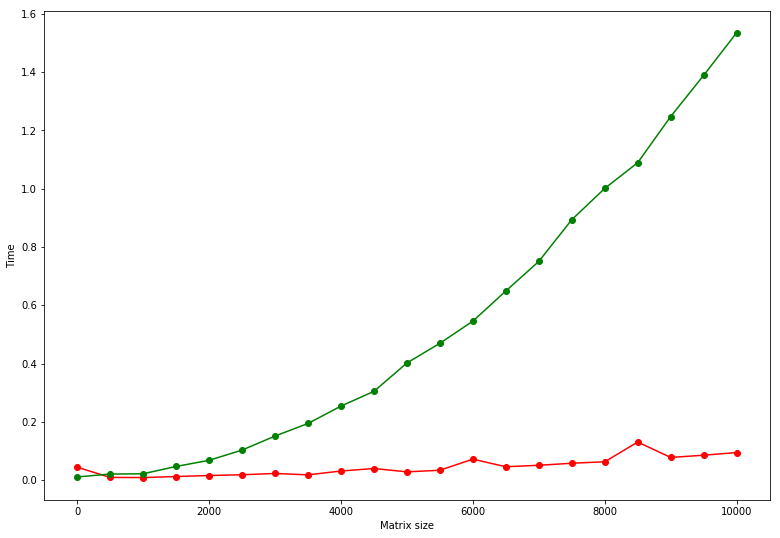

In [10]:
figure = plt.figure(figsize=(13,9))
plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'o-', color='red')
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-', color='green')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()

In [18]:
from numba import cuda
gpu=cuda.get_current_device()

In [19]:
gpu.name

b'GeForce GTX 950M'

In [17]:
import numpy as np
from numba import vectorize
from numba import autojit

@vectorize(['float32(float32, float32)'], target='cuda')
def Add(a, b):
    return a + b

# Initialize arrays
N = 1000000
A = np.ones(N, dtype=np.float32)
B = np.ones(A.shape, dtype=A.dtype)
C = np.empty_like(A, dtype=A.dtype)

# Add arrays on GPU
C = Add(A, B)


CudaAPIError: [2] Call to cuMemAlloc results in CUDA_ERROR_OUT_OF_MEMORY